## ML Test:
**Name:** Matheus Dantas Pereira

In [1]:
# Imports:
import pickle
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

### Retrieving Data:

In [3]:
# Loading data from pickle file:
pickle_file_path = 'mini_gm_public_v0.1.p'

# Open the pickle file in read-binary mode:
with open(pickle_file_path, 'rb') as file:
    # Load the data from the pickle file
    data = pickle.load(file)

# -	The structure of the dictionary saved in the pickle file:
# {'syndrome_id': { 'subject_id': {'image_id': [320x1 encoding]}}}

# Let's get all syndrome ids by checking data keys:
syndrome_ids = [synd_id for synd_id in data.keys()]

print('Syndrome ids:', syndrome_ids)

Syndrome ids: ['300000082', '300000080', '700018215', '100610883', '100180860', '300000018', '100192430', '300000034', '100610443', '300000007']


In [4]:
# Let's take one image as example to visualize.
# First let's get all syndrome subjects from syndrome id 0:
syndrome_subjects = [synd_sub for synd_sub in data[syndrome_ids[0]].keys()]

print('Syndrome 300000082 subjects:', syndrome_subjects)

Syndrome 300000082 subjects: ['595', '2638', '734490', '2770', '2642', '739644', '729196', '1314', '111', '739643', '739887', '739886', '739884', '739883', '735915', '170', '5902', '794', '2643', '739860', '738912', '738913', '735203', '738911', '2644', '926', '739596', '182', '183', '5906', '547', '739874', '5905', '735911', '5908', '739880', '728931', '728930', '728932', '738909', '203', '2768', '5903', '992', '2763', '2762', '2761', '2760', '2767', '2766', '2765', '2764', '734488', '734489', '2641', '738908', '2646', '921', '5907', '162', '105', '964', '965', '739878', '901', '739879', '729195', '750722', '738903', '738905', '738904', '739861', '2757', '5904', '754643', '728928', '728929', '728927', '738758', '1458', '738910', '2758', '2759']


In [5]:
# Let's check imgs ids:
imgs = data['300000082']['595']

for img_id in imgs.keys():
    print('Img id:', img_id)

Img id: 3543


In [6]:
# Retrieve the img:
example_img = data['300000082']['595']['3543']

# Img is encoded as a 1D vector of 320x1
print('Img Shape:', example_img.shape)

Img Shape: (320,)


In [17]:
# Let's organize data in a set with imgs and correspondent Syndrome Ids:
organized_data = []

for syndrome_id, value in data.items():
    for subject_id, img_id in value.items():
        for id, img in img_id.items():
            organized_data.append([syndrome_id, subject_id, id, np.array(img)])

# Convert it to pandas dataframe and visualize:
data_df = pd.DataFrame(organized_data)
data_df.columns = ['syndrome_id', 'subject_id', 'img_id','img']
data_df.head()

,syndrome_id,subject_id,img_id,img
0,300000082,595,3543,"[-0.03718013, 1.741486, 1.2061033, -0.45145318..."
1,300000082,2638,1633,"[2.4249947, 0.17991967, 2.9503245, 0.37993023,..."
2,300000082,734490,742992,"[-1.7893314, -0.21621145, 0.43431538, -0.55232..."
3,300000082,2770,1812,"[-1.1436926, -0.7146209, 0.31948757, 0.4556819..."
4,300000082,2642,1801,"[0.81417066, 1.3274913, 0.84728503, -0.2123311..."


In [18]:
# Let's Drop the irrelevant data and keep our inputs (imgs) and outputs (syndrome ids):
data_df.drop(columns=['subject_id', 'subject_id', 'img_id'], inplace=True)
data_df.head()

,syndrome_id,img
0,300000082,"[-0.03718013, 1.741486, 1.2061033, -0.45145318..."
1,300000082,"[2.4249947, 0.17991967, 2.9503245, 0.37993023,..."
2,300000082,"[-1.7893314, -0.21621145, 0.43431538, -0.55232..."
3,300000082,"[-1.1436926, -0.7146209, 0.31948757, 0.4556819..."
4,300000082,"[0.81417066, 1.3274913, 0.84728503, -0.2123311..."


### a)	Plotting t-SNE of the inputs, explaining the statistics and the data:

t-SNE, which stands for t-Distributed Stochastic Neighbor Embedding, is a popular technique in machine learning and data visualization for reducing the dimensionality of high-dimensional data while preserving its structure and relationships.

In [19]:
# Importing TSNE:
from sklearn.manifold import TSNE

### Apply t-SNE for dimensionality reduction:

**Let's use n_components as 2** as a good default as we are dealing with an img, and we are able to visualize.

Perplexity is a hyperparameter in t-SNE that balances the local and global aspects of the data.
It determines the effective number of neighbors that each point is compared to during optimization.
Perplexity should typically be set between 5 and 50.

A lower perplexity value places more emphasis on local relationships, while a higher perplexity value considers more global relationships.
It's recommended to try a range of perplexity values and evaluate the resulting visualizations to determine the most suitable value.
Common choices for perplexity include values like 5, 10, 20, 30, and 50, **let's take it on the middle as 25.**
random_state=42 as Douglas Adams would advise so.

In [37]:
tsne = TSNE(n_components=2, perplexity=25, random_state=42)

In [38]:
# Let's apply it to our data:
data_tsne = tsne.fit_transform(np.array(data_df['img'].tolist()))
data_tsne

array([[ 30.103596  ,  -0.9031854 ],
       [ 30.883945  , -19.301811  ],
       [ -7.0818934 ,  -5.5581055 ],
       ...,
       [ 16.447645  ,  10.81482   ],
       [ 16.093487  ,   0.56415594],
       [-21.916607  , -25.034214  ]], dtype=float32)

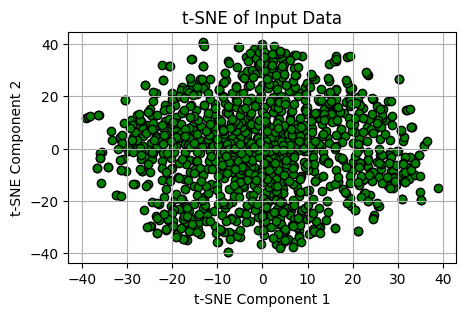

In [39]:
# Plot the t-SNE of img data:
plt.figure(figsize=(5, 3))
plt.scatter(data_tsne[:, 0], data_tsne[:, 1], marker='o', c='g', edgecolor='k')
plt.title('t-SNE of Input Data')
plt.xlabel('t-SNE Component 1')
plt.ylabel('t-SNE Component 2')
plt.grid(True)
plt.show()

### b)	Do a 10 fold cross validation for the following steps:
-	Calculate cosine distance from each test set vector to the gallery vectors
-	Calculate euclidean distance from each test set vector to the gallery vectors
-	Classify each image (vector) or each subject to syndrome Ids based on KNN algorithm for both cosine and euclidean distances.
